<a href="https://colab.research.google.com/github/GVAmit/ML-notes/blob/main/Arbitary%20Value%20Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
from sklearn.model_selection import train_test_split
from sklearn. impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [44]:
df = pd.read_csv('titanic_toy.csv')

In [45]:
df.sample(5)


,Age,Fare,Family,Survived
842,30.0,31.0000,0,1
780,13.0,7.2292,0,1
790,NaN,7.7500,0,0
217,42.0,27.0000,1,0
242,29.0,10.5000,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [47]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [48]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [50]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)
#

In [51]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
278,7.0,29.1250,5,7.0,7.0,29.1250,29.1250
187,45.0,26.5500,0,45.0,45.0,26.5500,26.5500
289,22.0,7.7500,0,22.0,22.0,7.7500,7.7500
784,25.0,7.0500,0,25.0,25.0,7.0500,7.0500
154,NaN,7.3125,0,99.0,-1.0,7.3125,7.3125


In [54]:
print('Original Age variable variance : ', X_train['Age'].var())
print('Age imputed with 99 then variance : ', X_train['Age_99'].var())
print('Age imputed with -1 then variance : ', X_train['Age_minus1'].var())

print('Original Fare variable variance : ', X_train['Fare'].var())
print('Fare imputed with 999 then variance : ', X_train['Fare_999'].var())
print('Fare imputed with -1 then variance : ', X_train['Fare_minus1'].var())

Original Age variable variance :  210.2517072477438
Age imputed with 99 then variance :  932.9665366701436
Age imputed with -1 then variance :  315.99550362600644
Original Fare variable variance :  2761.031434948639
Fare imputed with 999 then variance :  47525.47059536007
Fare imputed with -1 then variance :  2675.2394049177087


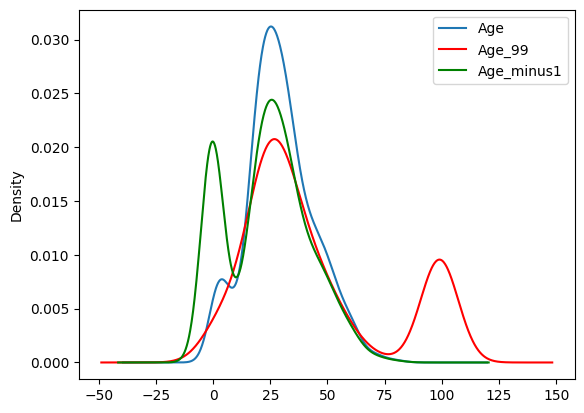

In [56]:
from os import linesep
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_99'].plot(kind='kde',ax = ax,color = 'red')

X_train['Age_minus1'].plot(kind='kde',ax=ax,color = 'green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: ylabel='Density'>

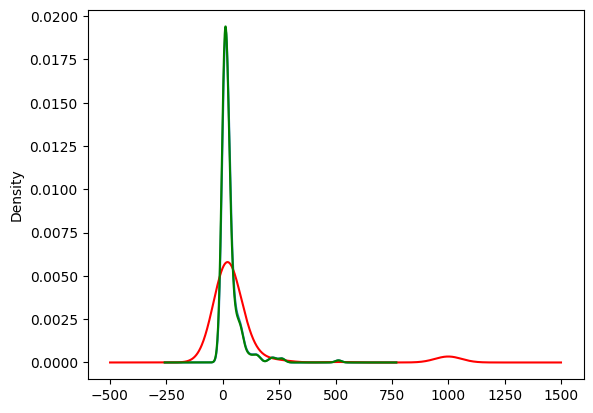

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_999'].plot(kind='kde',ax = ax,color = 'red')

X_train['Fare_minus1'].plot(kind='kde',ax=ax,color = 'green')

In [61]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
Fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [60]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
Fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


<Axes: >

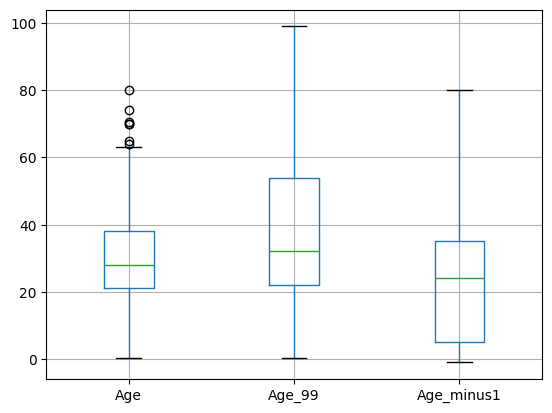

In [58]:
X_train[['Age','Age_99', 'Age_minus1']].boxplot()

<Axes: >

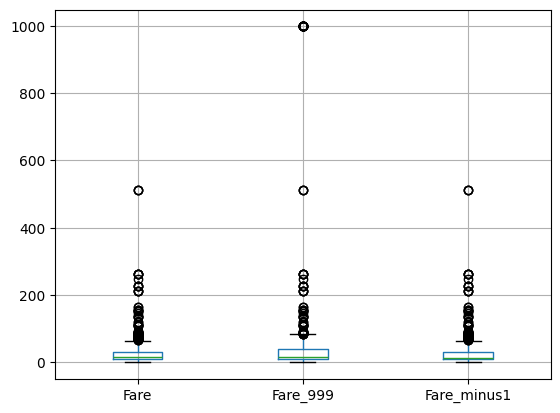

In [59]:
X_train[['Fare','Fare_999', 'Fare_minus1']].boxplot()

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
imputer1 = SimpleImputer(strategy='constant',fill_value = 99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [64]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']),
],remainder='passthrough')

In [65]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [66]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [67]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0
